Итерация 0, максимальное изменение: 9.17e-01
Итерация 100, максимальное изменение: 1.28e-02
Итерация 200, максимальное изменение: 7.39e-03
Итерация 300, максимальное изменение: 5.07e-03
Итерация 400, максимальное изменение: 3.71e-03
Итерация 500, максимальное изменение: 2.82e-03
Итерация 600, максимальное изменение: 2.21e-03
Итерация 700, максимальное изменение: 1.78e-03
Итерация 800, максимальное изменение: 1.49e-03
Итерация 900, максимальное изменение: 1.28e-03
Итерация 1000, максимальное изменение: 1.13e-03
Итерация 1100, максимальное изменение: 1.02e-03
Итерация 1200, максимальное изменение: 9.24e-04
Итерация 1300, максимальное изменение: 8.48e-04
Итерация 1400, максимальное изменение: 7.81e-04
Итерация 1500, максимальное изменение: 7.21e-04
Итерация 1600, максимальное изменение: 6.66e-04
Итерация 1700, максимальное изменение: 6.15e-04
Итерация 1800, максимальное изменение: 5.67e-04
Итерация 1900, максимальное изменение: 5.23e-04
Итерация 2000, максимальное изменение: 4.81e-04
Итер

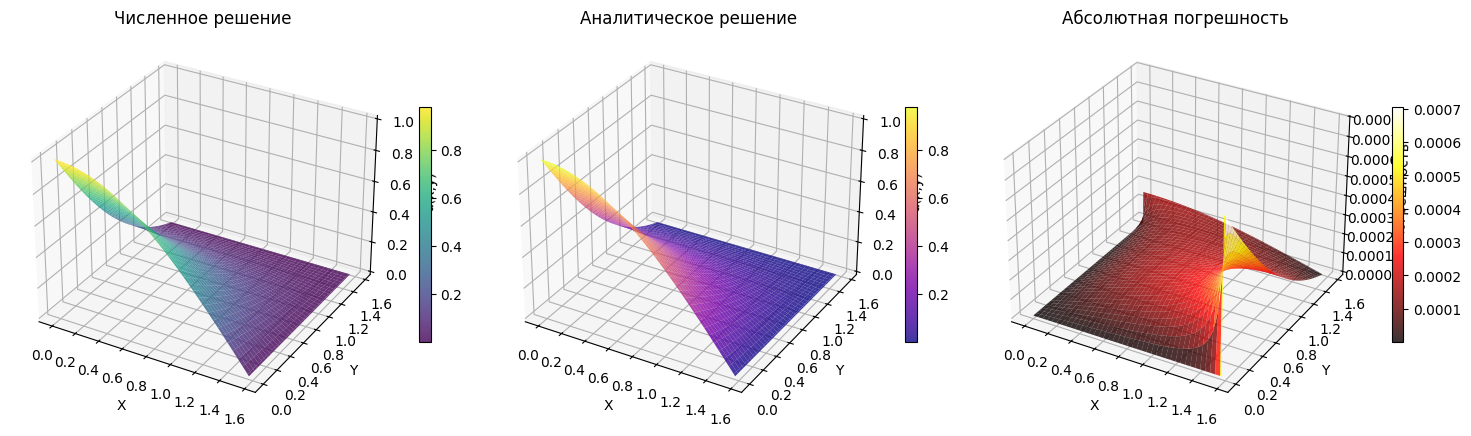

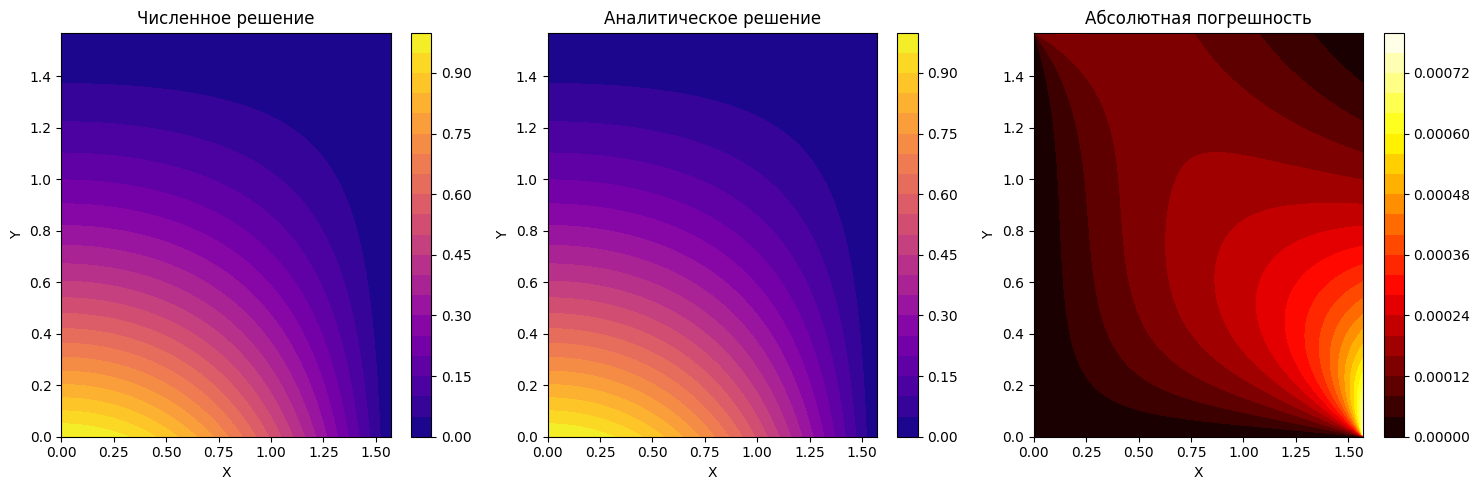

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Коэффициенты уравнения
a_coeff = 1.0
b_coeff = 1.0
c_coeff = 0.0
d_coeff = -2.0
e_coeff = -3.0

# Правая часть уравнения
f = lambda x, y: 0

# Граничные условия
alpha1 = 0.0
beta1 = 1.0
gamma1 = lambda y: np.exp(-y) * np.cos(y)

alpha2 = 0.0
beta2 = 1.0
gamma2 = lambda y: 0

alpha3 = 0.0
beta3 = 1.0
gamma3 = lambda x: np.cos(x)

alpha4 = 0.0
beta4 = 1.0
gamma4 = lambda x: 0

# Параметры области
Lx = np.pi / 2
Ly = np.pi / 2

# Аналитическое решение
analytical_solution = lambda x, y: np.exp(-y) * np.cos(x) * np.cos(y)

# Шаги сетки
hx = 0.01
hy = 0.01

X = np.arange(0, Lx + hx/2, hx)
Y = np.arange(0, Ly + hy/2, hy)

max_iter = 50_000
eps = 1e-9

theta = 1.5

def l2_norm(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def solve_elliptic_equation(method="simple_iterations"):
    N = len(X) - 1
    M = len(Y) - 1
    u_num = np.zeros((len(X), len(Y)))
    
    
    if abs(alpha1) < eps:
        u_num[0, :] = gamma1(Y) / beta1
    if abs(alpha2) < eps:
        u_num[N, :] = gamma2(Y) / beta2
    if abs(alpha3) < eps:
        u_num[:, 0] = gamma3(X) / beta3
    if abs(alpha4) < eps:    
        u_num[:, M] = gamma4(X) / beta4
    
    for i in range(1, N):
        for j in range(1, M):
            u_num[i, j] = (
                (1 - i / N) * u_num[0, j] +
                (i / N) * u_num[N, j] +
                (1 - j / M) * u_num[i, 0] +
                (j / M) * u_num[i, M]
            ) / 2
       
    for k in range(max_iter):
        u_old = u_num.copy()
        
        for i in range(1, N):
            for j in range(1, M):
                if method == "libman":
                    u_num[i, j] = (
                        u_old[i - 1, j] * (a_coeff / hx ** 2 + c_coeff / (2 * hx)) + 
                        u_old[i + 1, j] * (a_coeff / hx ** 2 - c_coeff / (2 * hx)) + 
                        u_old[i, j - 1] * (b_coeff / hy ** 2 + d_coeff / (2 * hy)) + 
                        u_old[i, j + 1] * (b_coeff / hy ** 2 - d_coeff / (2 * hy)) - 
                        f(X[i], Y[j])
                    ) / (2 * a_coeff / hx ** 2 + 2 * b_coeff / hy ** 2 + e_coeff)
                elif method == "zeidel":
                    u_num[i, j] = (
                        u_num[i - 1, j] * (a_coeff / hx ** 2 + c_coeff / (2 * hx)) + 
                        u_num[i + 1, j] * (a_coeff / hx ** 2 - c_coeff / (2 * hx)) + 
                        u_num[i, j - 1] * (b_coeff / hy ** 2 + d_coeff / (2 * hy)) + 
                        u_num[i, j + 1] * (b_coeff / hy ** 2 - d_coeff / (2 * hy)) - 
                        f(X[i], Y[j])
                    ) / (2 * a_coeff / hx ** 2 + 2 * b_coeff / hy ** 2 + e_coeff)
                elif method == "upper_relaxation":
                    u_num[i, j] = (
                        theta * ((
                            u_num[i - 1, j] * (a_coeff / hx ** 2 + c_coeff / (2 * hx)) + 
                            u_num[i + 1, j] * (a_coeff / hx ** 2 - c_coeff / (2 * hx)) + 
                            u_num[i, j - 1] * (b_coeff / hy ** 2 + d_coeff / (2 * hy)) + 
                            u_num[i, j + 1] * (b_coeff / hy ** 2 - d_coeff / (2 * hy)) - 
                            f(X[i], Y[j])
                            ) / (2 * a_coeff / hx ** 2 + 2 * b_coeff / hy ** 2 + e_coeff)
                        ) + (1 - theta) * u_num[i, j]
                    )
                    
        if abs(alpha1) > eps:
            u_num[0, :] = (gamma1(Y) - u_num[1, :] * (2 * alpha1 / hx) - u_num[2, :] * (-alpha1 / 2 / hx)) / (-3 * alpha1 / 2 / hx + beta1)
        if abs(alpha2) > eps:
            u_num[N, :] = (gamma2(Y) - u_num[N - 1, :] * (-2 * alpha2 / hx) - u_num[N - 2, :] * (alpha2 / 2 / hx)) / (3 * alpha2 / 2 / hx + beta2)
        if abs(alpha3) > eps:
            u_num[:, 0] = (gamma3(X) - u_num[:, 1] * (2 * alpha3 / hy) - u_num[:, 2] * (-alpha3 / 2 / hy)) / (-3 * alpha3 / 2 / hy + beta3)
        if abs(alpha4) > eps:    
            u_num[:, M] = (gamma4(X) - u_num[:, M - 1] * (-2 * alpha4 / hy) - u_num[:, M - 2] * (alpha4 / 2 / hy)) / (3 * alpha4 / 2 / hy + beta4)
    
                         
        if k % 100 == 0:
            print(f"Итерация {k}, максимальное изменение: {l2_norm(u_num, u_old):.2e}")
        
        if l2_norm(u_num, u_old) < eps:
            print(f"Сходимость достигнута на итерации {k}")
            break
                  
    return u_num

def calculate_error(u_num):
    """Расчет погрешности численного решения"""
    u_analytical = np.zeros_like(u_num)
    
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            u_analytical[i, j] = analytical_solution(x, y)
    
    # Абсолютная погрешность
    absolute_error = np.abs(u_num - u_analytical)
    
    # Относительная погрешность (избегаем деления на ноль)
    relative_error = np.zeros_like(absolute_error)
    mask = np.abs(u_analytical) > 1e-10
    relative_error[mask] = absolute_error[mask] / np.abs(u_analytical[mask])
    
    # Нормы погрешности
    l1_error = np.mean(absolute_error)
    l2_error = np.sqrt(np.mean(absolute_error**2))
    linf_error = np.max(absolute_error)
    
    return u_analytical, absolute_error, relative_error, l1_error, l2_error, linf_error

def plot_results(u_num, u_analytical, absolute_error):
    """Визуализация результатов"""
    X_grid, Y_grid = np.meshgrid(X, Y, indexing='ij')
    
    fig = plt.figure(figsize=(15, 5))
    
    # Численное решение
    ax1 = fig.add_subplot(131, projection='3d')
    surf1 = ax1.plot_surface(X_grid, Y_grid, u_num, cmap='viridis', alpha=0.8)
    ax1.set_title('Численное решение')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('u(x,y)')
    fig.colorbar(surf1, ax=ax1, shrink=0.5)
    
    # Аналитическое решение
    ax2 = fig.add_subplot(132, projection='3d')
    surf2 = ax2.plot_surface(X_grid, Y_grid, u_analytical, cmap='plasma', alpha=0.8)
    ax2.set_title('Аналитическое решение')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('u(x,y)')
    fig.colorbar(surf2, ax=ax2, shrink=0.5)
    
    # Погрешность
    ax3 = fig.add_subplot(133, projection='3d')
    surf3 = ax3.plot_surface(X_grid, Y_grid, absolute_error, cmap='hot', alpha=0.8)
    ax3.set_title('Абсолютная погрешность')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Погрешность')
    fig.colorbar(surf3, ax=ax3, shrink=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Контурные графики
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    cont1 = axes[0].contourf(X_grid, Y_grid, u_num, levels=20, cmap='plasma')
    axes[0].set_title('Численное решение')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    plt.colorbar(cont1, ax=axes[0])
    
    cont2 = axes[1].contourf(X_grid, Y_grid, u_analytical, levels=20, cmap='plasma')
    axes[1].set_title('Аналитическое решение')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y')
    plt.colorbar(cont2, ax=axes[1])
    
    cont3 = axes[2].contourf(X_grid, Y_grid, absolute_error, levels=20, cmap='hot')
    axes[2].set_title('Абсолютная погрешность')
    axes[2].set_xlabel('X')
    axes[2].set_ylabel('Y')
    plt.colorbar(cont3, ax=axes[2])
    
    plt.tight_layout()
    plt.show()

def print_comparison(u_num, u_analytical, absolute_error):
    """Вывод сравнения численного и аналитического решений"""
    print("\nСравнение решений:")
    print("X\tY\tЧисленное\tАналитическое\tПогрешность")
    print("-" * 60)
    
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            print(f"{x:.2f}\t{y:.2f}\t{u_num[i,j]:.6f}\t{u_analytical[i,j]:.6f}\t{absolute_error[i,j]:.2e}")

if __name__ == "__main__":   
    # Решение уравнения
    methods = ["libman", "zeidel", "upper_relaxation"]
    u_num = solve_elliptic_equation(methods[2])
    
    # Расчет погрешности
    u_analytical, absolute_error, relative_error, l1_error, l2_error, linf_error = calculate_error(u_num)
    
    # Вывод результатов погрешности
    print("\n" + "="*50)
    print("АНАЛИЗ ПОГРЕШНОСТИ")
    print("="*50)
    print(f"L1 норма погрешности: {l1_error:.2e}")
    print(f"L2 норма погрешности: {l2_error:.2e}")
    print(f"L∞ норма погрешности: {linf_error:.2e}")
    print(f"Средняя относительная погрешность: {np.mean(relative_error):.2e}")
    print(f"Максимальная относительная погрешность: {np.max(relative_error):.2e}")
    
    # Вывод сравнения в таблице
    print_comparison(u_num, u_analytical, absolute_error)
    
    # Визуализация
    plot_results(u_num, u_analytical, absolute_error)